## data loader

In [1]:
from graphlstm_vae_ad import GraphLSTM_VAE_AD
import pandas as pd
import numpy as np

process = "lu.C.16"
process2 = "lu.C.16_inject_cpuocp"
duration = "100ms_closed"

DATASET = "/home/sx/MPI_profile/"+ process + "/" + duration + "/node_feature.csv"
TOPOLOGY = "/home/sx/MPI_profile/"+ process + "/" + duration + "/graph_edge"

DATASET2 = "/home/sx/MPI_profile/"+ process2 + "/" + duration + "/node_feature.csv"
# TOPOLOGY = "/home/sx/MPI_profile/"+ process + "/" + duration + "/graph_edge"

def edge_load(filename, len):
    edge_data = pd.read_csv(filename, header=0)
    edge_data = edge_data.groupby(['ts_id','src', 'dst']).agg({'commsize': 'sum'}).reset_index()
    edge_index_dict = {}
    edge_weight_dict = {}
    for ts_id, group in edge_data.groupby('ts_id'):
        edge_index = group[['src', 'dst']].values.T.tolist()  # Transpose to get shape (2, num_edges)
        edge_index_dict[ts_id] = edge_index

        edge_weight = group['commsize'].values.tolist()
        edge_weight_dict[ts_id] = edge_weight

    edge_index_list = []
    edge_weight_list = []
    for i in range(len):
        if i in edge_index_dict.keys():
            edge_index_list.append(edge_index_dict[i])
            edge_weight_list.append(edge_weight_dict[i])

            
        else:
            edge_index_list.append([[], []])
            edge_weight_list.append([])

    return edge_index_list, edge_weight_list


def data_load(filename): 
    data = pd.read_csv(filename, header=[0,1])
    data.columns.names = ['metric', 'host']
    tempm = data.stack()
    tempm = (tempm-tempm.mean())/(tempm.std())
    metric = tempm.unstack().swaplevel('metric','host',axis=1).stack().unstack()

    edge_index, edge_weight = edge_load(TOPOLOGY, len(metric))
    # edge_data = pd.read_csv(TOPOLOGY, header=0)
    # edge_data = edge_data.groupby(['ts_id','src', 'dst']).agg({'commsize': 'sum'}).reset_index()
    # edge_data = edge_data.groupby(['src', 'dst']).agg({'commsize': 'sum'}).reset_index()

    # edge_index = edge_data[['src', 'dst']].values.T.tolist()
    # edge_weight = edge_data['commsize'].values.tolist()

    print("metric:")
    print(len(metric))

    print("Edge Index:")
    print(len(edge_index))
    print(edge_index)

    print("Edge Weight:")
    print(len(edge_weight))
    print(edge_weight)

    return metric, edge_index, edge_weight

metric, edge_index, edge_weight = data_load(DATASET)
# metric2, edge_index = data_load(DATASET2)


metric:
693
Edge Index:
693
[[[], []], [[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15], [1, 4, 0, 2, 5, 1, 3, 6, 2, 7, 0, 5, 8, 1, 4, 6, 9, 2, 5, 7, 10, 3, 6, 11, 4, 9, 12, 5, 8, 10, 13, 6, 9, 11, 14, 7, 10, 15, 8, 13, 9, 12, 14, 10, 13, 15, 11, 14]], [[0, 8, 12, 13, 13, 14, 14, 15], [1, 9, 13, 12, 14, 13, 15, 14]], [[0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 13, 14, 15], [4, 0, 5, 1, 3, 6, 2, 7, 0, 5, 8, 1, 4, 9, 2, 5, 7, 10, 3, 6, 11, 4, 12, 5, 8, 13, 6, 9, 11, 14, 7, 10, 15, 8, 9, 10, 11]], [[0, 0, 1, 1, 2, 2, 3, 4, 4, 5, 5, 6, 6, 7, 8, 8, 9, 9, 10, 10, 11, 12, 13, 14], [1, 4, 2, 5, 3, 6, 7, 5, 8, 6, 9, 7, 10, 11, 9, 12, 10, 13, 11, 14, 15, 13, 14, 15]], [[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 

## 加载数据与模型

In [5]:
print(len(metric), len(metric2))

NameError: name 'metric2' is not defined

In [23]:
metric_merge = pd.concat([metric, metric2], axis=0)
print(metric_merge)

host      node_0                                                              \
metric  vector_0  vector_1 vector_10 vector_11 vector_12 vector_13 vector_14   
0       1.122609  0.906011  0.841623 -1.649309  1.878091  1.501773  0.412117   
1      -1.397817 -0.566163  1.995718 -2.107698 -1.474490  1.529491 -1.199982   
2      -0.401646  0.548433  0.433314  0.139202  0.163268 -0.751216  0.642706   
3       2.297195 -2.667956 -1.990150 -2.812143  1.058776  0.149935 -2.912314   
4      -0.148084  0.607459 -0.064216  0.265476  0.010582 -0.253831  0.572610   
...          ...       ...       ...       ...       ...       ...       ...   
1113   -0.085948 -0.119559 -0.429606  0.043148  0.035760 -0.110767  0.117666   
1114    0.871155  0.280678  0.053131  0.745682  0.660536  0.744916 -0.130956   
1115   -1.573691  0.526633  0.029276 -1.256910  0.274181 -1.255935  1.652289   
1116   -1.185763 -1.660001  0.531648 -1.204471 -0.594119 -0.961253  0.675191   
1117   -6.673521 -4.498385 -6.047570 -5.

In [2]:
# model = GraphLSTM_VAE_AD(sequence_length=120, gpu=1)
process = "test"
duration = "100ms"
model = GraphLSTM_VAE_AD(name=process + "_" + duration, gpu=1,  sequence_length=90, hidden_dim=8, batch_size=32, lr=1e-3, num_epochs=1000)

## 训练模型

Epoch [65/1000], Iter [10/13], total_loss: 17137.9180
valid_loss: [24102.53671875, 23909.727734375, 23603.4125, 23338.94453125, 23011.209375, 22769.92109375, 22628.271484375, 22394.64453125, 22111.48203125, 21893.84296875, 21957.7484375, 21416.81484375, 20837.56015625, 20442.277734375, 20002.84765625, 19849.759375, 19824.087890625, 19650.5, 19558.375390625, 19629.669140625, 19467.88671875, 19387.305859375, 19396.684765625, 19506.07109375, 19181.237890625, 19164.6421875, 19066.5734375, 18989.062109375, 18982.899609375, 18927.190234375, 18878.919921875, 18834.440234375, 18810.137890625, 18754.246875, 18632.1671875, 18606.299609375, 18588.048828125, 18495.394140625, 18511.414453125, 18366.534765625, 18266.35546875, 18141.9671875, 18040.23671875, 18111.205859375, 18060.79765625, 17961.869140625, 17821.2921875, 17832.492578125, 17871.59453125, 17780.260546875, 17687.46953125, 17676.711328125, 17593.68671875, 17589.600390625, 17524.166015625, 17630.16953125, 17709.1234375, 17464.9515625, 175

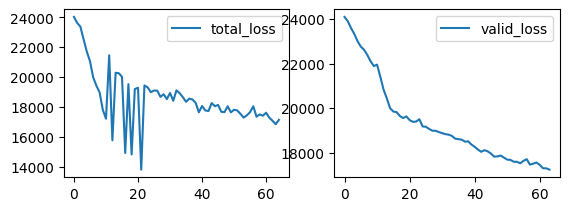

 23%|██▎       | 3/13 [00:08<00:29,  2.98s/it]

In [3]:
model.fit(metric, 16, edge_index, log_step=10, patience=20, step=10)

In [47]:
model.load(16, metric.shape[1])

In [52]:
scores_sum = []
scores_max = []
scores = []
outputs = []
scores, scores_sum, scores_max, outputs = model.predict(metric2, 16, edge_index, 1)

  0%|          | 0/33 [00:00<?, ?it/s]

100%|██████████| 33/33 [00:57<00:00,  1.73s/it]

1029
(90,)
1029
(90, 16)


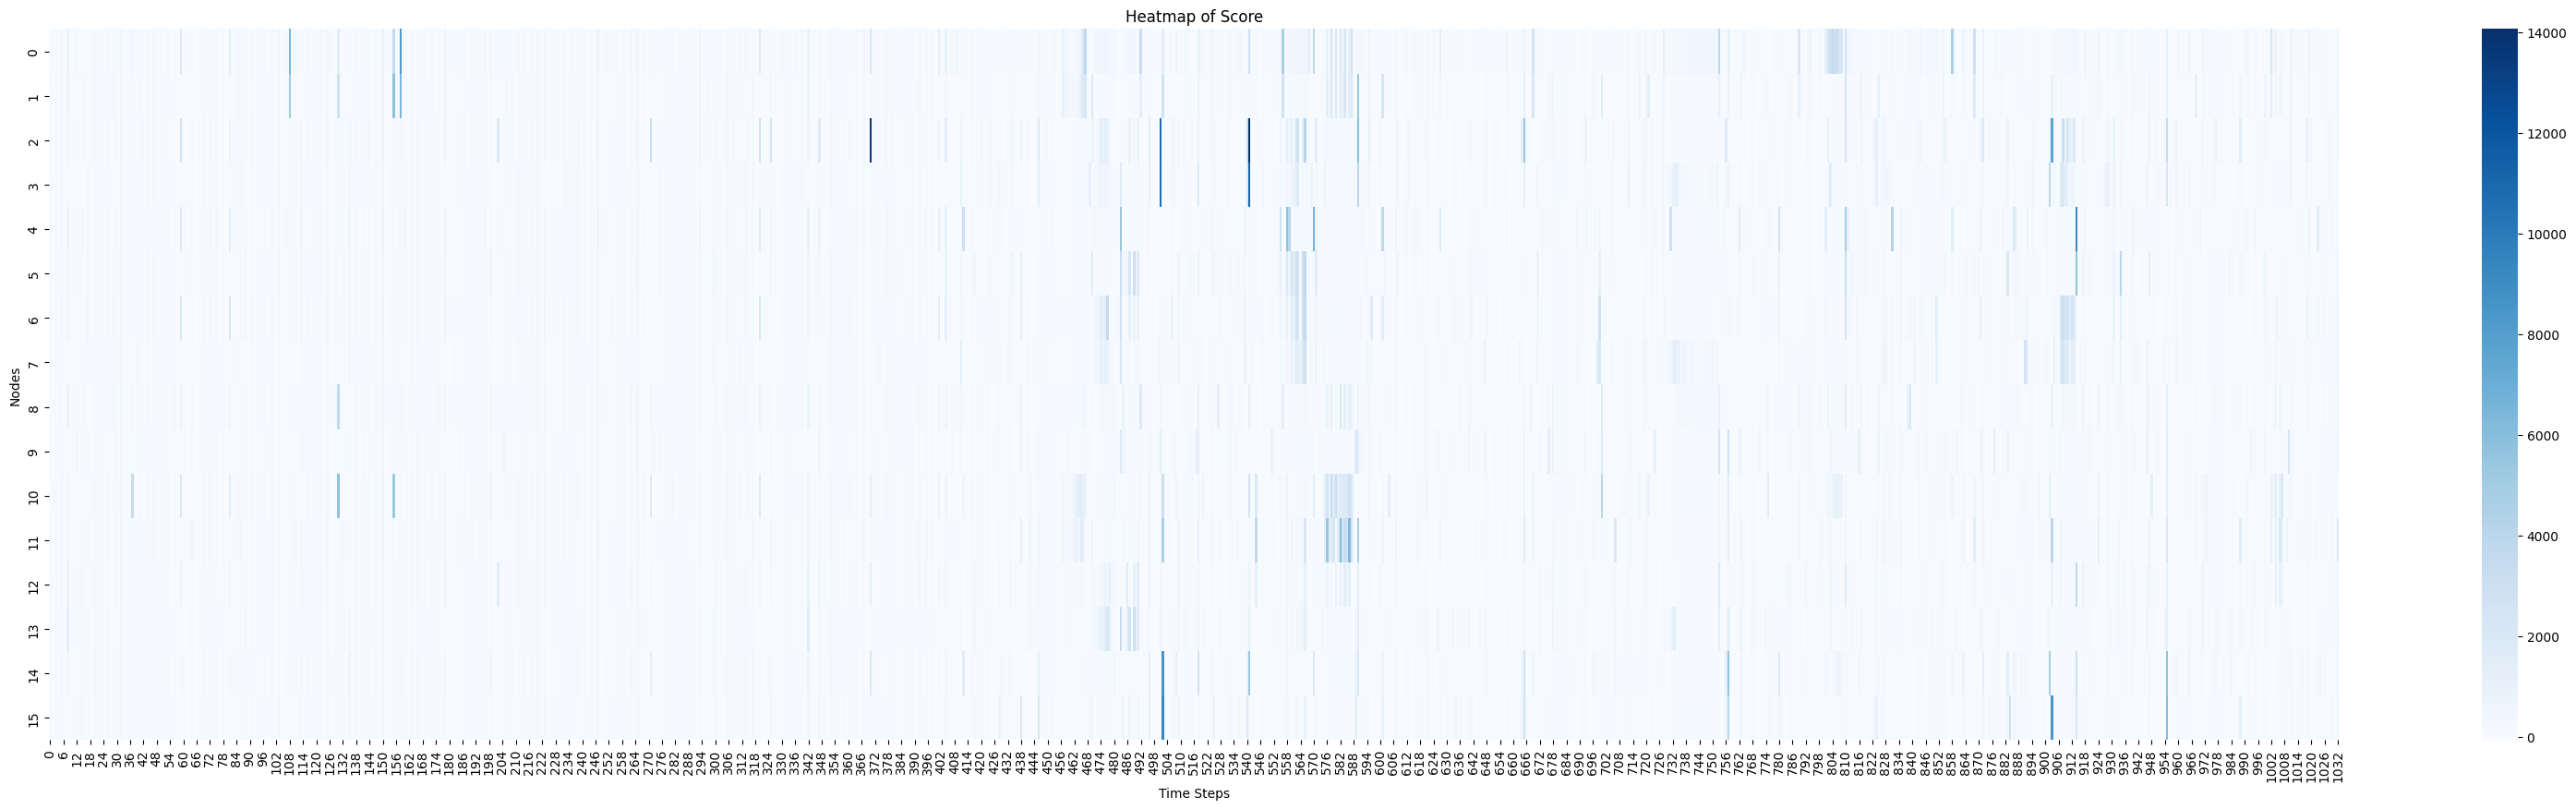

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sequence_length = 30
step = 10

shuffle_scores = scores
# print(scores.shape)
# # shuffle_scores = []
# shuffle_scores = np.zeros_like(scores)
# for seq in scores:
#     for step_index in range(sequence_length):
#         idx = step_index * step
#         shuffle_scores[idx:idx + step] += seq[step_index]



# 假设 scores_sum 是形状为 (699, 16) 的数组
# scores_sum = np.random.rand(699, 16)
shuffle_scores = shuffle_scores.T
# scores = scores[:, :700]
# 设置绘图尺寸
plt.figure(figsize=(40, 10))

# 使用 seaborn 绘制热力图
# vmin=-100, vmax=1500
sns.heatmap(shuffle_scores, cmap='Blues', cbar=True)

# 设置标题和标签
plt.title('Heatmap of Score')
plt.xlabel('Time Steps')
plt.ylabel('Nodes')

# 显示热力图
plt.show()

In [29]:
print(outputs.shape)

(695, 16, 8)


In [30]:
mylog = open('/home/sx/MPI_profile/lu.C.16/100ms/output.txt', mode = 'a',encoding='utf-8')
for i in range(len(outputs)):
    print(outputs[i], file=mylog)
mylog.close()
# df_outputs = pd.DataFrame(data=outputs)
# df_outputs.to_csv('outputs.csv')
# print(outputs)

In [32]:
mylog = open('/home/sx/MPI_profile/lu.C.16/100ms/scores_sum.txt', mode = 'a',encoding='utf-8')
for i in range(len(scores_max)):
    print(scores_max[i], file=mylog)
mylog.close()

In [ ]:
mylog = open('/home/sx/MPI_profile/lu.C.16/100ms/scores_max.txt', mode = 'a',encoding='utf-8')
for i in range(len(scores_max)):
    print(scores_max[i], file=mylog)
mylog.close()